In [71]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time

In [72]:
def read_img_pair(left_img, right_img):
    imgL = cv2.imread(left_img, 0)
    imgL = imgL.astype(int)
    imgR = cv2.imread(right_img, 0)
    imgR = imgR.astype(int)
    return imgL, imgR

In [73]:
def SAD(blockL, blockR):
    if blockL.shape != blockR.shape:
        return -1
    return np.sum(abs(blockL - blockR))

In [74]:
def SSD(blockL, blockR):
    if blockL.shape != blockR.shape:
        return -1
    return np.sum(np.square(blockL - blockR))

In [116]:
def find_best_match(h, w, blockL, imgR):
    height, width = imgR.shape
    # Get search range for the right image
    w_min = max(0, w - SW)
    w_max = min(width, w + SW)
    min_sad = None
    min_index = None
    for wi in range(w_min+BL, w_max-BL):
        blockR = imgR[h-BL: h+BL, wi-BL: wi+BL]
        sad = SSD(blockL, blockR)
        if min_sad == None:
            min_sad = sad
            min_index = (h, wi)
        else:
            if sad < min_sad:
                min_sad = sad
                min_index = (h, wi)
    return min_index

In [117]:
def disparity_map(imgL, imgR):
    if imgL.shape != imgR.shape:
        raise "Image pairs mismatch!"
    height, width = imgL.shape
    dm = np.zeros((height, width))
    
    # Loop through each pixel
    tic = time.time()
    for h in range(BL, height-BL):
        for w in range(BL, width-BL):
            blockL = imgL[h-BL:h + BL, w-BL:w + BL]
            matched = find_best_match(h, w, blockL, imgR)
            dm[h, w] = abs(matched[1] - w)
    toc = time.time()
    totaltime.append(toc-tic)
    #print(dm)
    plt.imshow(dm, cmap='hot', interpolation='nearest')
    plt.axis('off') 
    plt.show()

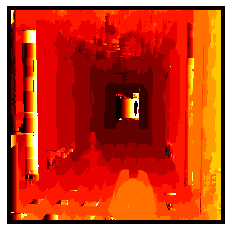

KeyboardInterrupt: 

In [121]:
BLOCK_LENGTHs = [11, 23]
SEARCH_WIDTHs = [41, 61, 81]
totaltime = []

if __name__ == '__main__':
    images = [["images/corridorl.jpg", "images/corridorr.jpg"], ['images/triclopsi2l.jpg','images/triclopsi2r.jpg']]
    for img_pair in images:
        imgL, imgR = read_img_pair(img_pair[0], img_pair[1])
        totaltime = []
        for BLOCK_LENGTH in BLOCK_LENGTHs:
            for SEARCH_WIDTH in SEARCH_WIDTHs:
                BL = round((BLOCK_LENGTH - 1)/2)
                SW = round((SEARCH_WIDTH - 1)/2)
                disparity_map(imgL, imgR)
        print(np.average(totaltime))